In [222]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

In [223]:
titanic = pd.read_csv('preprocessing_TitnicFinal.csv')

In [224]:
titanic=titanic.drop(['Embarked_Q', 'Embarked_S'],axis=1)

titanic.head()

,Pclass,Sex,Age,Fare,Parch,SibSp,Survived
0,3,1,-0.592481,-0.502445,-0.473674,0.432793,0
1,1,0,0.638789,0.786845,-0.473674,0.432793,1
2,3,0,-0.284663,-0.488854,-0.473674,-0.474545,1
3,1,0,0.407926,0.420730,-0.473674,0.432793,1
4,3,1,0.407926,-0.486337,-0.473674,-0.474545,0


In [225]:
titanic.shape

(891, 7)

In [226]:
X= titanic.drop('Survived', axis=1)
Y=titanic['Survived']

In [227]:
# convert to numpy arrays
X=X.values
Y=Y.values

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [230]:
# convert x features to float tensors
X_train=torch.tensor(X_train, dtype = torch.float32)
X_test=torch.tensor(X_test, dtype = torch.float32)

In [231]:
# convert y to float tensor
y_test= torch.tensor(y_test, dtype=torch.float32).reshape(-1,1)
y_train= torch.tensor(y_train, dtype=torch.float32).reshape(-1,1)

## Data Loader

In [232]:
train_data= TensorDataset(X_train, y_train)
test_data= TensorDataset(X_test, y_test)
train_loader= DataLoader(train_data, batch_size=16, shuffle=True)
test_loader= DataLoader(test_data, batch_size=16)

In [233]:
class titanicNN(nn.Module):
    def __init__(self, input_size):
        super(titanicNN, self).__init__()
        
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)
        

In [234]:
# Initialize model, loss, and optimizer
model = titanicNN(input_size=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 50
losses=[]

for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/50, Loss: -0.0000
Epoch 20/50, Loss: -0.0000
Epoch 30/50, Loss: -0.0000
Epoch 40/50, Loss: -0.0000
Epoch 50/50, Loss: -0.0000


In [235]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 57.46%


C:\Users\user\AppData\Local\Temp\ipykernel_10904\4076295788.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


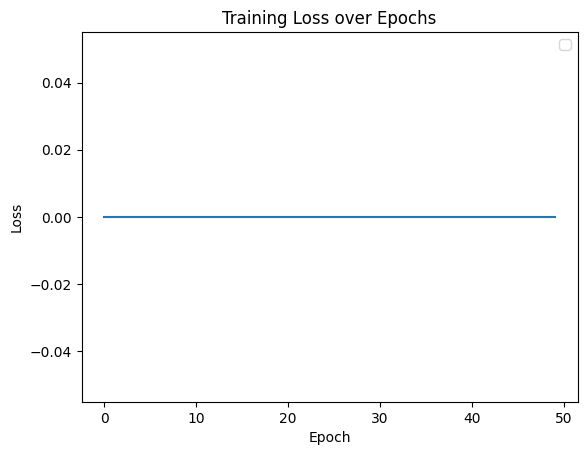

In [236]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.show()